## Observations and Insights 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.

mice_count = mouse_data_complete["Mouse ID"].value_counts()

mice_count.count()

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice


array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = pd.DataFrame(duplicate_mice)

duplicate_data

,0
0,g989


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_data_complete = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)==False]

new_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [66]:
# Checking the number of mice in the clean DataFrame.

new_data_count = new_data_complete["Mouse ID"].value_counts()

new_data_count.count()

248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = new_data_complete.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

regimen_mean 

regimen_median = new_data_complete.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

regimen_median

regimen_variance = new_data_complete.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

regimen_variance

regimen_std = new_data_complete.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

regimen_std

regimen_sem = new_data_complete.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

regimen_sem


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_df = pd.DataFrame({
    
    "Mean": regimen_mean, 
    "Median": regimen_median, 
    "Variance": regimen_variance, 
    "Standard Deviation": regimen_std, 
    "Standard Error of Mean": regimen_sem})

regimen_df


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

one_line = new_data_complete.groupby('Drug Regimen')

one_line_df = one_line.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

one_line_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

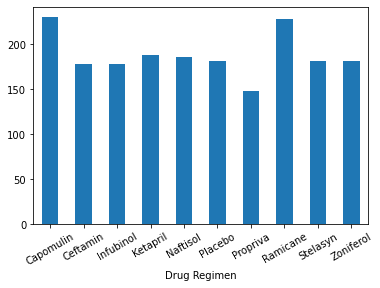

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurement_count = new_data_complete.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

plot_measurement_count = measurement_count.plot.bar(legend=False, rot=30)

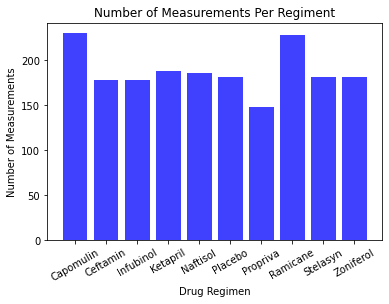

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

x_axis = np.arange(0,len(regimens))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

y_axis = measurement_count



plt.title("Number of Measurements Per Regiment")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Measurements")


plt.bar(x_axis,y_axis,facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations,regimens, rotation = 30)
       
plt.show()

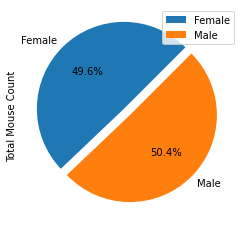

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_sex = new_data_complete.groupby(["Mouse ID","Sex"])

groupby_sex_df = pd.DataFrame(groupby_sex.size())

countby_sex = pd.DataFrame(groupby_sex_df.groupby(["Sex"]).count())

countby_sex.columns = ["Total Mouse Count"]


explode = (0.1,0)

countby_sex.groupby(['Sex']).sum().plot(kind='pie', y='Total Mouse Count', startangle=45, explode = explode, autopct="%1.1f%%")



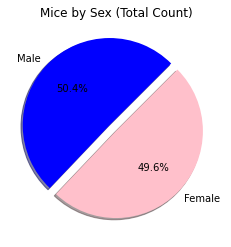

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Retrieve numbers from "countby_sex"

labels = ["Male","Female"]

sex_counts = [125,123]

colors = ["blue", "pink"]

explode1 = (0.1,0)

plt.title("Mice by Sex (Total Count)")

plt.pie(sex_counts, explode=explode1, labels = labels, colors = colors, autopct="%1.1f%%", shadow= True, startangle=45)


plt.show()

## Quartiles, Outliers and Boxplots

In [279]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


capomulin_data = new_data_complete.loc[new_data_complete["Drug Regimen"] == "Capomulin",:]
ramicane_data = new_data_complete.loc[new_data_complete["Drug Regimen"]== "Ramicane", :]
infubinol_data = new_data_complete.loc[new_data_complete["Drug Regimen"]== "Infubinol",:]
ceftamin_data = new_data_complete.loc[new_data_complete["Drug Regimen"]=="Ceftamin",:]


    
# Start by getting the last (greatest) timepoint for each mouse

cap_last_time = new_data_complete.groupby('Mouse ID').max()['Timepoint']

cap_last_time_df = pd.DataFrame(cap_last_time)

cap_last_time_df

# Capomulin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cap_time_df

merge_cap = pd.merge(cap_time_df, new_data_complete, on=("Mouse ID","Timepoint"),how="left")

merge_cap.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [280]:
# Do it again for Ramicane

#Ramicane

ram_time = ramicane_data.groupby('Mouse ID').max()['Timepoint']

ram_time_df = pd.DataFrame(ram_time)

    
# Start by getting the last (greatest) timepoint for each mouse

ram_last_time = new_data_complete.groupby('Mouse ID').max()['Timepoint']

ram_last_time_df = pd.DataFrame(ram_last_time)

ram_last_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ram_time_df

merge_ram = pd.merge(ram_time_df, new_data_complete, on=("Mouse ID","Timepoint"),how="left")

merge_ram.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [283]:
# And Infubinol

# Infubinol

inf_time = infubinol_data.groupby('Mouse ID').max()['Timepoint']

inf_time_df = pd.DataFrame(infubinol_data)

inf_time_df

# Greatest Timepoint

inf_last_time = new_data_complete.groupby('Mouse ID').max()['Timepoint']

inf_last_time_df = pd.DataFrame(inf_last_time)

inf_last_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

inf_time_df

merge_inf = pd.merge(inf_time_df, new_data_complete, on=("Mouse ID","Timepoint"),how="left")

merge_inf.head()



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,0,45.000000,0,Infubinol,Female,20,23,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0,Infubinol,Female,20,23,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1,Infubinol,Female,20,23,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1,Infubinol,Female,20,23,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1,Infubinol,Female,20,23,55.173336,1


In [243]:
# Finally, ceftamin

# Ceftamin

cef_time = ceftamin_data.groupby('Mouse ID').max()['Timepoint']

cef_time_df = pd.DataFrame(ceftamin_data)

    
# Start by getting the last (greatest) timepoint for each mouse

last_time = new_data_complete.groupby('Mouse ID').max()['Timepoint']

last_time_df = pd.DataFrame(last_time)

last_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cef_time_df

merge_cef = pd.merge(cef_time_df, new_data_complete, on=("Mouse ID","Timepoint"),how="left")

merge_cef.head()



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a275,Ceftamin,Female,20,28,0,45.000000,0,Ceftamin,Female,20,28,45.000000,0
1,a275,Ceftamin,Female,20,28,5,46.795257,0,Ceftamin,Female,20,28,46.795257,0
2,a275,Ceftamin,Female,20,28,10,47.371343,0,Ceftamin,Female,20,28,47.371343,0
3,a275,Ceftamin,Female,20,28,15,49.734404,0,Ceftamin,Female,20,28,49.734404,0
4,a275,Ceftamin,Female,20,28,20,50.513437,1,Ceftamin,Female,20,28,50.513437,1


In [273]:
# We will be estimating the Quarts/IQR through the merged 

# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Recreate database with max timepoints

max_timepoint = new_data_complete.groupby("Mouse ID").max()["Timepoint"]

max_timepoint_merge = pd.merge(max_timepoint,new_data_complete, on=["Mouse ID", "Timepoint"], how="left")

max_timepoint_merge

#-----------------------------------------------------------------

# Find Q's and Upper/Lower Bound for Capomulin

cap_tumor_vol = merge_cap["Tumor Volume (mm3)"]

cap_quartiles = cap_tumor_vol.quantile([.25,.5,.75])

cap_high_q = cap_quartiles[.75]

cap_low_q = cap_quartiles[.25]

cap_iqr = cap_high_q

cap_up_bound = cap_high_q + (1.5*cap_iqr)

cap_low_bound = cap_low_q - (1.5*cap_iqr)

cap_quartiles
    
    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    
     

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [275]:

#-----------------------------------------------------------------

# Find Q's and Upper/Lower Bound for Ramicane

ram_tumor_vol = merge_ram["Tumor Volume (mm3)"]

ram_quartiles = ram_tumor_vol.quantile([.25,.5,.75])

ram_high_q = ram_quartiles[.75]

ram_low_q = ram_quartiles[.25]

ram_iqr = ram_high_q

ram_up_bound = ram_high_q + (1.5*ram_iqr)

ram_low_bound = ram_low_q - (1.5*ram_iqr)

ram_quartiles 
    
    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    
     

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [284]:

#-----------------------------------------------------------------

# Find Q's and Upper/Lower Bound for Infubinol

# For some reason, the INF dataframe has duplicate columns, hence the "_X"

inf_tumor_vol = merge_inf["Tumor Volume (mm3)_x"]

inf_quartiles = inf_tumor_vol.quantile([.25,.5,.75])

inf_high_q = inf_quartiles[.75]

inf_low_q = inf_quartiles[.25]

inf_iqr = inf_high_q

inf_up_bound = inf_high_q + (1.5*ram_iqr)

inf_low_bound = inf_low_q - (1.5*ram_iqr)

inf_quartiles

    
    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    
     

0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3)_x, dtype: float64

In [293]:

#-----------------------------------------------------------------

# Find Q's and Upper/Lower Bound for Ceftamine

# For some reason, the INF dataframe has duplicate columns, hence the "_X"

cef_tumor_vol = merge_cef["Tumor Volume (mm3)_x"]

cef_quartiles = cef_tumor_vol.quantile([.25,.5,.75])

cef_high_q = cef_quartiles[.75]

cef_low_q = cef_quartiles[.25]

cef_iqr = cef_high_q

cef_up_bound = cef_high_q + (1.5*ram_iqr)

cef_low_bound = cef_low_q - (1.5*ram_iqr)

cef_quartiles

    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    
     

0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3)_x, dtype: float64

In [305]:
# Method 2 - Merge Big Dataframe 


maxtime= new_data_complete.groupby("Mouse ID").max()["Timepoint"]

merge_maxtime = pd.merge(maxtime, new_data_complete, on=["Mouse ID", "Timepoint"], how="left")

merge_maxtime

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [315]:
# Find Outliers & Run Loop

tumor_vol_data = []

for treatment in treatments:
    
    # Method 2 
    
    filter_df = merge_maxtime.loc[:,"Drug Regimen"]== treatment
    quartiles = [.25,.5,.75]
    tumor_vol = merge_maxtime.loc[filter_df,"Tumor Volume (mm3)"]
    tumor_vol_data.append(merge_maxtime.loc[filter_df, "Tumor Volume (mm3)"])
    
    
    q_quartiles = tumor_vol.quantile(quartiles)
    
    q_lower_q = q_quartiles.loc[.25]
    q_high_q = q_quartiles.loc[.75]
    q_iqr = q_high_q - q_lower_q
    
    qlower_bound = q_lower_q - (1.5*q_iqr)
    qhigher_bound = q_high_q + (1.5*q_iqr)
    
   
    treatment_filter = (tumor_vol>qhigher_bound) | (tumor_vol<qlower_bound)
    
    count_outliers = (len(tumor_vol.loc[treatment_filter]))
    
    print(f"There are {count_outliers} outliers for the drug {treatment}.")
    

There are 0 outliers for the drug Capomulin.
There are 0 outliers for the drug Ramicane.
There are 1 outliers for the drug Infubinol.
There are 0 outliers for the drug Ceftamin.


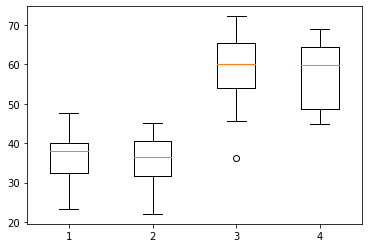

In [318]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

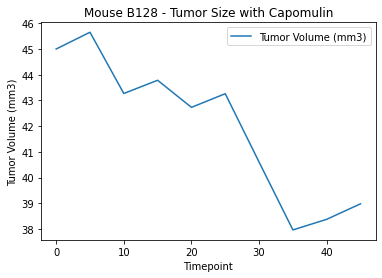

In [322]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

treatment_filter1 = new_data_complete.loc[:,"Drug Regimen"]=="Capomulin"

capomulin = new_data_complete.loc[treatment_filter1,:]

treatment_filter1 = capomulin.loc[:,"Mouse ID"]=="b128"

single_mouse = capomulin.loc[treatment_filter1, :]

single_mouse.plot("Timepoint","Tumor Volume (mm3)")

# Plot

plt.xlabel("Timepoint")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Mouse B128 - Tumor Size with Capomulin")

plt.show()

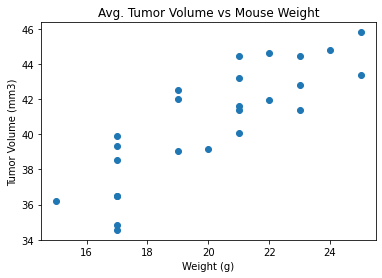

In [329]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

volume_weight_plot = capomulin[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].groupby("Mouse ID").mean()

plt.scatter(volume_weight_plot["Weight (g)"],volume_weight_plot["Tumor Volume (mm3)"])

# Plot

plt.xlabel("Weight (g)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Avg. Tumor Volume vs Mouse Weight")

plt.show()

# Correlation and Regression



In [325]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(volume_weight_plot["Weight (g)"],volume_weight_plot["Tumor Volume (mm3)"])[0],2)
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: 0.84


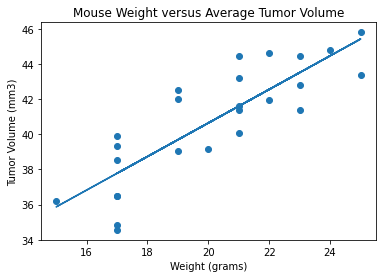

In [328]:
# Linear Regression -- y = mx + b

m, b, r, p, std = st.linregress(volume_weight_plot["Weight (g)"], volume_weight_plot["Tumor Volume (mm3)"])


y_pred = m*volume_weight_plot["Weight (g)"]+b

plt.scatter(volume_weight_plot["Weight (g)"],volume_weight_plot["Tumor Volume (mm3)"])

plt.plot(volume_weight_plot["Weight (g)"], y_pred)

plt.xlabel("Weight (grams)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Mouse Weight versus Average Tumor Volume")

plt.show()
                                                                
                                                    

